## Stock Market Clustering with Enhanced Feature Analysis
This project initially focuses on clustering stocks based on their daily movements, utilizing KMeans and Hierarchical Clustering techniques. The daily movement, calculated as the difference between each stock's opening and closing values, serves as a primary indicator of daily volatility and trend. Initially, this single feature forms the basis of our clustering analysis, providing insights into how stocks behave on a day-to-day basis.

As the project progresses, I expand the analysis by incorporating additional features: the 10-day and 50-day Moving Averages (MA), and trading volume. By clustering stocks using these enriched data sets, the project aims to uncover more complex patterns and relationships. This multi-faceted approach allows for a deeper understanding of stock market dynamics, revealing how stocks group together not just based on daily price changes, but also considering their general trends and market activity. Comparing the results of clustering with just daily movements against clustering with these additional features provides valuable insights into the strengths and limitations of each method, enhancing the overall stock market data analysis.


In [9]:
import pandas as pd
import numpy as np 
import scipy.cluster.hierarchy as sch
from pandas_datareader import data as pdr
import datetime as dt
import yfinance as yf
yf.pdr_override()

from yahoo_fin import stock_info as si 
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans


### Importing Stock Data for Analysis
In this initial step, I import stock data for analysis. The focus is on the companies listed in the Dow Jones Industrial Average (Dow 30), which are retrieved using the `si.tickers_dow()` function. I set the time frame for data collection to the past four years, from four years ago to the current date. This duration is chosen to provide a comprehensive view of each company's stock performance over a significant period.

Using the `pdr.get_data_yahoo` function, I fetch the stock data for all Dow 30 companies for this period. The data includes daily opening and closing values, which are crucial for calculating daily movements. I then extract the opening and closing values and convert them into NumPy arrays for efficient computation. The daily movements are calculated as the difference between the closing and opening values of each stock on each day. This measure of daily movement is a key factor in the subsequent clustering analysis, as it reflects the daily volatility and trend of each stock.


In [10]:
# Importing Data
companies_dow30 = si.tickers_dow()

start = dt.datetime.now() - dt.timedelta(days=365*4)
end = dt.datetime.now()

data = pdr.get_data_yahoo(list(companies_dow30), start, end)

open_values = np.array(data['Open'].T)
close_values = np.array(data['Close'].T)
daily_movements = close_values - open_values
daily_movements

[*********************100%%**********************]  30 of 30 completed


array([[ 0.71499634,  0.20999908, -0.01499939, ...,  0.06999207,
         1.63000488,  2.87001038],
       [ 3.69999695, -0.74000549, -0.27000427, ...,  0.18002319,
        -3.14001465,  7.45999146],
       [-1.97000122,  0.95999908, -0.76999664, ..., -0.00999451,
         2.6499939 ,  3.34999084],
       ...,
       [ 0.5       ,  0.09000015, -0.64999771, ..., -0.62000275,
        -0.27000046, -0.09000015],
       [-0.38000107, -0.77000046, -0.02999878, ..., -0.43000031,
        -0.06999969,  1.75      ],
       [ 0.12000275,  0.33000183, -1.65000153, ...,  0.1000061 ,
         0.13999939,  2.5       ]])

### Setting Up the Clustering Pipeline
In this section, I set up the pipeline for clustering the stock data. The first step is to normalize the daily movements using the `Normalizer` class. Normalization is crucial as it ensures that each stock's movements are considered on a relative scale, making the analysis more robust and less sensitive to the scale of the data.

I then define the clustering model using the KMeans algorithm, specifying `k` as 5 to create five clusters. This choice of `k` is based on the desire to segment the Dow 30 stocks into a manageable number of groups for analysis. 

The `make_pipeline` function is used to chain the normalizer and the KMeans model into a single workflow. This pipeline is then fitted to the daily movements data, effectively clustering the stocks. After fitting, I extract the cluster labels for each stock, which indicate the cluster each stock belongs to.

To better understand the clustering result, I create a list of stocks for each cluster. This involves iterating over each stock and appending it to the corresponding cluster based on its label. Finally, I print out the stocks in each cluster, providing a clear view of how the Dow 30 stocks are grouped based on their daily movements. This output is instrumental in analyzing the market behavior and identifying patterns among different stocks.


In [11]:
# Prepare Pipeline
normalizer = Normalizer()
k = 5
clustering_model = KMeans(n_clusters=k, max_iter=1000)
pipeline = make_pipeline(normalizer, clustering_model)
pipeline.fit(daily_movements)
cluster_labels = pipeline.named_steps['kmeans'].labels_

# Get a list of stocks in each cluster

clusters = []
for j in range(0,k):
    clusters.append([])
for i in range(0,30):
    clusters[cluster_labels[i]].append(list(companies_dow30)[i])

# Print out clusters

for j in range(0,k):
    print (j+1, clusters[j])


1 ['AXP', 'BA', 'CAT', 'CVX', 'DIS', 'DOW', 'GS', 'JPM', 'TRV']
2 ['HON', 'IBM', 'MCD', 'MMM', 'WBA']
3 ['AMGN', 'JNJ', 'MRK', 'UNH']
4 ['AAPL', 'CRM', 'CSCO', 'HD', 'INTC', 'MSFT', 'NKE', 'V']
5 ['KO', 'PG', 'VZ', 'WMT']


c:\Users\jayli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Hierarchical Clustering and Dendrogram Visualization
In this part of the analysis, I focus on hierarchical clustering of the Dow 30 stocks based on their daily movements. First, I adjust the figure size using the `rcParams` from the `pylab` module to ensure that the dendrogram, which visualizes the hierarchical clustering, is large enough to be easily readable.

I then perform hierarchical clustering using Ward's method by applying the `linkage` function from the `scipy.cluster.hierarchy` module to the daily movements data. Ward's method is a popular choice for hierarchical clustering as it minimizes the variance within each cluster, leading to more coherent and meaningful clusters.

The dendrogram is displayed using the `dendrogram` function, with the orientation set to 'left' for better visibility of the stock labels. Each leaf in the dendrogram represents one of the Dow 30 companies, labeled accordingly. The dendrogram visually represents the hierarchical structure of the clusters, showing how each stock is grouped with others based on the similarity of their daily movements. 


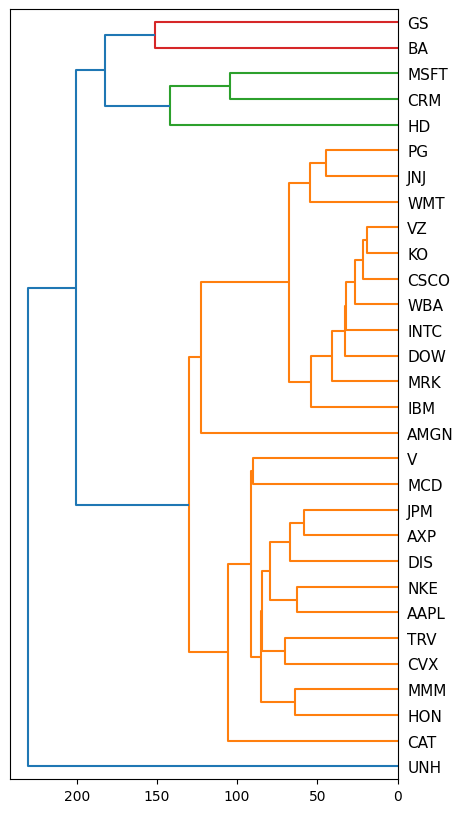

In [12]:

# Adjust figure size to accommodate the full tree

from pylab import rcParams
rcParams['figure.figsize'] = 5, 10

# Do hierarchical clustering using Ward's method

z = sch.linkage(daily_movements, method='ward')

# Display dendrogram

info = sch.dendrogram(z, orientation='left', labels=list(companies_dow30), leaf_font_size=11)

### Adding Several Key Features to the Data

I shall now calculate and add several key features to this data:
- **Volume**: The total number of shares traded during each day. This feature reflects the stock's liquidity and investor interest, and it can be a significant indicator of market sentiment and momentum.
- **10 Day Moving Average (MA)**: The average closing price over the past 10 days. This short-term moving average smooths out daily price variations to give a clearer trend.
- **50 Day Moving Average (MA)**: Similar to the 10 Day MA, but calculated over a longer period (50 days), offering insight into the longer-term trend and momentum of the stock.

To handle any missing values in the moving averages, particularly at the start of the time series where there aren't enough data points to calculate the MAs, I fill these gaps with zeros. This ensures consistency in the dataset.

Finally, I compile the processed data for all companies into a single DataFrame, `combined_data`, using a multi-level column structure. This DataFrame now serves as a rich dataset, encompassing not just daily movements but also trading volume and moving averages, ready for in-depth stock market analysis and clustering.


In [13]:
data ={}
for company in list(companies_dow30):
    stock_data = pdr.get_data_yahoo(company, start, end)
    stock_data["Daily Movement"] = stock_data['Close'] - stock_data['Open']
    stock_data['10 Day MA'] = stock_data['Close'].rolling(window=10).mean()
    stock_data['50 Day MA'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['10 Day MA'] = stock_data['10 Day MA'].fillna(0)
    stock_data['50 Day MA'] = stock_data['50 Day MA'].fillna(0)

    data[company] = stock_data[['Daily Movement', 'Volume', '10 Day MA', '50 Day MA']]
combined_data = pd.concat(data, axis=1)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

### Preparing and Executing the Clustering Pipeline
In this section of the analysis, I prepare the data for clustering and then execute the KMeans clustering algorithm. The first step involves standardizing the data for each company in the Dow 30. Standardization, performed using the `StandardScaler`, is crucial as it normalizes the features (Daily Movement, Volume, 10 Day MA, 50 Day MA) of each stock, ensuring that the clustering algorithm treats them equally. This step helps in mitigating the influence of varying scales and variances across different features.

Once the data is standardized, I construct the feature matrix. This matrix consolidates the standardized features of each stock into a single array, which serves as the input for the clustering algorithm. The feature matrix is essentially a flattened array of features for each stock, ensuring that each stock's complete profile is considered during clustering.

In [14]:
# Prepare Pipeline
scaler = StandardScaler()
for company in list(companies_dow30):
    combined_data[company] = scaler.fit_transform(combined_data[company])


feature_matrix = np.array([combined_data[company].values.flatten() for company in list(companies_dow30)])
k = 5
kmeans = KMeans(n_clusters=k, max_iter=1000)
kmeans.fit(feature_matrix)
labels = kmeans.labels_

# Get a list of stocks in each cluster

clusters = []
for j in range(0,k):
    clusters.append([])
for i in range(0,30):
    clusters[labels[i]].append(list(companies_dow30)[i])

# Print out clusters

for j in range(0,k):
    print (j+1, clusters[j])


1 ['AXP', 'BA', 'CAT', 'DOW', 'GS', 'HON', 'JPM']
2 ['AMGN', 'CVX', 'IBM', 'JNJ', 'KO', 'MCD', 'MRK', 'PG', 'TRV', 'WMT']
3 ['AAPL', 'CSCO', 'HD', 'MSFT', 'UNH', 'V']
4 ['DIS', 'INTC', 'MMM', 'VZ', 'WBA']
5 ['CRM', 'NKE']


c:\Users\jayli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Hierarchical Clustering and Dendrogram Visualization



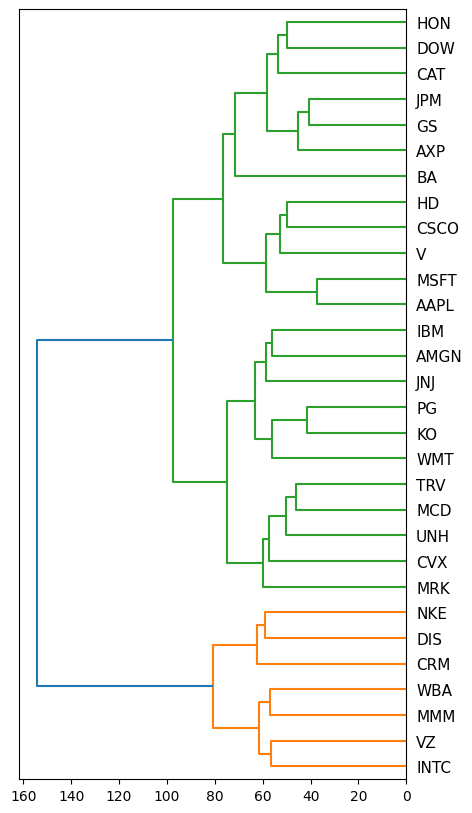

In [15]:
# Adjust figure size to accommodate the full tree

from pylab import rcParams
rcParams['figure.figsize'] = 5, 10

# Do hierarchical clustering using Ward's method

z = sch.linkage(feature_matrix, method='ward')

# Display dendrogram

info = sch.dendrogram(z, orientation='left', labels=list(companies_dow30), leaf_font_size=11)